# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations, but there are some missing values

#### Question 2. Create a summary table

In [5]:
#function

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores range from 200-800 while GPA can range from 0-4. Therefore since the ranges are so different in scale, the STD will be very different.

#### Question 4. Drop data points with missing data


In [7]:
df_drop = df_raw.dropna()
df_drop.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: we can see that all the columns have the same number of counts now

In [8]:
df_drop.isnull().count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

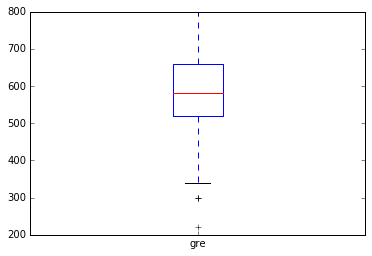

In [9]:
#boxplot 1
df_drop.loc[:,"gre"].plot(kind='box')

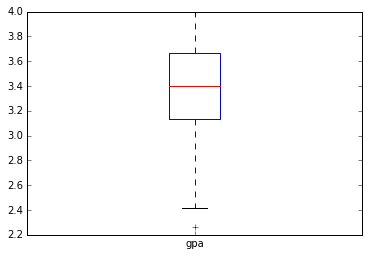

In [34]:
#boxplot 2 
df_drop.loc[:,"gpa"].plot(kind='box')

#### Question 7. What do this plots show?

Answer: the show the quartiles, max, min, and median, and some outliers

#### Question 8. Describe each distribution 

Axes(0.125,0.125;0.775x0.775)


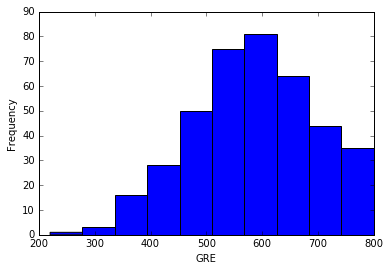

In [10]:
# plot the distribution of each variable 
print df_drop.loc[:,"gre"].plot(kind='hist') 
plt.xlabel('GRE')

Axes(0.125,0.125;0.775x0.775)


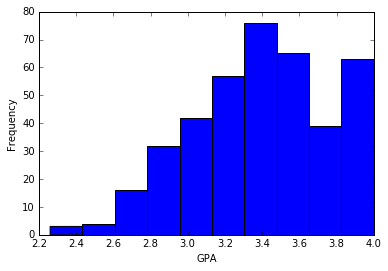

In [36]:
print df_drop.loc[:,"gpa"].plot(kind='hist')
plt.xlabel('GPA')

Axes(0.125,0.125;0.775x0.775)


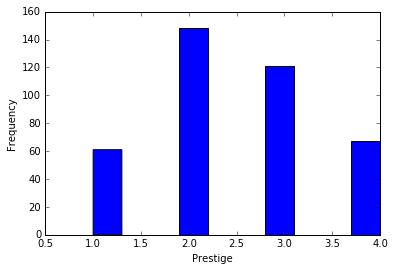

In [37]:
print df_drop.loc[:,"prestige"].plot(kind='hist')
plt.xlabel('Prestige')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [38]:
stats.normaltest(df_drop, axis=0)


NameError: name 'stats' is not defined

Based on the Pvalue array, we see that all the values are less than .05, therefore we would reject that the distributions are normal. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: these distributions are limited in their possible answers, therefore the dists are cut off and skewed. We can use a logistic regression, and drop outliers. 

#### Question 11. Which of our variables are potentially colinear? 

In [39]:
# create a correlation matrix for the data
df_drop.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


gre and gpa could have been guessed to be colinear because a good student would have high values for both. But according to the correlation matrix, they are not very correlated.

#### Question 12. What did you find?

Answer: using a linear model, we can see that there are is a positive relationship between gpa and admit, but a negative relation between prestige and admit. Our model shoed a slight positive relationship btwn gre and admit, but it's p-value was too large to accept it.

In [40]:
lm = sm.OLS(df_drop['admit'], df_drop[['gre','gpa','prestige']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     80.87
Date:                Fri, 08 Apr 2016   Prob (F-statistic):           8.76e-41
Time:                        20:25:22   Log-Likelihood:                -240.27
No. Observations:                 397   AIC:                             486.5
Df Residuals:                     394   BIC:                             498.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0004      0.000      1.949      0.052      -3.4e-06     0.001
gpa            0.1097      0.040      2.745      0.006         0.031     0.188
prestige      -0.1158      0.022     -5.189      0.000        -0.160    -0.072
==============================================================================
Omnibus:                      202.929   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.585
Skew:                           0.679   Prob(JB):                     3.81e-12
Kurtosis:                       1.845   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
model = smf.ols(formula='admit ~ gre + gpa + prestige', data=df_drop).fit()

# print the coefficients
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Fri, 08 Apr 2016   Prob (F-statistic):           1.65e-08
Time:                        20:25:23   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: we will need to first translate these variables a little, probably with Log(). We need our model to give us a better probability that won't go above 1 or below 0. We can also transform the prestige variable into 4 dummy variables. Once we have transformed the data, we can run logistic regressions along with linear regressions, changing the variable associations to fine tune the models and pick the best one.

#### Question 14. What is your hypothesis? 

Answer: I hypothesize that there is a positive relationship for gre and gpa but a negative one for prestige. I hypothesize that we will be able to calculate the probability that a student will be admitted dependent on his gre, gpa, and prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [11]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#df_imp = df_raw.impputer.fit()

In [12]:
#df_imp.count()